In [1]:
import os
from pathlib import Path

os.chdir(Path.cwd().parent)
# print("cwd is now:", Path.cwd())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from data_loader import scores_df
from fit import fit_statistical_model

null performances after coercion: 0
after saturation filter 2408
after filter num benchmarks 1965
after merge with model versions 1961
after date filter (>= 2022-11-01) 1762
after merge with benchmark dates 1762
Original number of rows: 1762
Number of rows after aggregation: 1320


In [3]:

import seaborn as sns
sns.set()
sns.set_style("whitegrid")

# Custom color palette
custom_colors = [
    '#00A5A6',  # teal
    '#E03D90',  # pink
    '#FC6538',  # orange
    '#6A3ECB',  # purple
    '#0058DC',  # blue
    '#EA8D00',  # yellow
    '#B087F4',  # lightPurple
    '#279E27',  # green
    '#009AF1',  # lightBlue
    '#015D90',  # darkBlue
    '#EA4831',  # red
    '#E1C700',  # yellow2
    '#46FFFF',  # turquoise
    '#63F039',  # lightGreen
]

sns.set_palette(custom_colors)
colors = sns.color_palette()

# === Seaborn global settings ===
sns.set_theme(
    style="whitegrid",        # or "darkgrid", "ticks", "white"
    palette=custom_colors,    # your custom color palette
    context="notebook"        # scaling for labels/titles ("paper", "notebook", "talk", "poster")
)

# === Matplotlib global settings (rcParams) ===
plt.rcParams.update({
    # Figure
    "figure.figsize": (8, 5),
    "figure.dpi": 120,
    
    # Axes
    "axes.titley": 1.02,
    "axes.titlesize": 14,
    "axes.titlelocation": 'center',
    "axes.titlepad": 0,
    "axes.labelsize": 12,
    "axes.labelpad": 10,           # spacing between axis and label
    "axes.spines.top": False,
    "axes.spines.right": False,
    
    # Ticks
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    # tick marks size
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    
    # tick visibility
    "xtick.top": False,
    "xtick.bottom": True,
    "ytick.left": True,
    "ytick.right": False,
    
    # Legend
    "legend.fontsize": 10,
    "legend.loc": "upper left",
    "legend.frameon": True,
    "legend.borderaxespad": 0,

    
    # Lines and markers
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "lines.markeredgecolor": 'auto',   # white outline (stroke)
    "lines.markeredgewidth": 0.5,   
    # title alignment left
    

    
    
    # Error bars
    "errorbar.capsize": 3,
    
    # Font
    "font.family": "Arial",
    "font.sans-serif": ["DejaVu Sans"],
    
    # Grid
    "grid.alpha": 0.3,
    "grid.linestyle": "-",
    "grid.color": "lightgray",
})


In [4]:
anchor_mode = "model"  # "model", "benchmark"
anchor_benchmark = "Winogrande"
anchor_difficulty = 0
anchor_slope = 1
anchor_model1 = "claude-2.0"
anchor_model1_capability = 1.177630
anchor_model2 = "claude-3-opus-20240229"
anchor_model2_capability = 1.311554

df_anchor, df_cm_anchor, df_db_anchor = fit_statistical_model(
    scores_df,
    anchor_mode=anchor_mode,
    anchor_benchmark=anchor_benchmark,
    anchor_difficulty=anchor_difficulty,
    anchor_slope=anchor_slope,
    anchor_model1=anchor_model1,
    anchor_model1_capability=anchor_model1_capability,
    anchor_model2=anchor_model2,
    anchor_model2_capability=anchor_model2_capability,
)

df_cm_anchor["date_obj"] = pd.to_datetime(df_cm_anchor["date"])

# anchor_benchmark = "Winogrande"
# anchor_difficulty = 0
# anchor_slope = 1
# df_anchor, df_cm_anchor, df_db_anchor = fit_statistical_model(scores_df, anchor_benchmark, anchor_difficulty, anchor_slope)

# # Convert date strings to datetime objects
# df_cm_anchor['date_obj'] = pd.to_datetime(df_cm_anchor['date'])

`ftol` termination condition is satisfied.
Function evaluations 30, initial cost 4.7806e+01, final cost 3.5079e+00, first-order optimality 5.77e-04.


In [5]:
all_runs = {}  # will map benchmark_name -> dict of outputs
failed = []  # keep track of anything that errors out

# --- loop --------------------------------------------------------------------
for _, row in df_db_anchor.iterrows():
    anchor_benchmark = row["benchmark_name"]  # e.g. "HellaSwag"
    anchor_difficulty = float(row["estimated_difficulty"])
    anchor_slope = float(row["estimated_slope"])

    try:
        df, df_cm, df_db = fit_statistical_model(
            scores_df,
            anchor_mode="benchmark",
            anchor_benchmark=anchor_benchmark,
            anchor_difficulty=anchor_difficulty,
            anchor_slope=anchor_slope,
        )
        all_runs[anchor_benchmark] = {
            "df1": df,
            "df_cm1": df_cm,
            "df_db": df_db,
            # cache the anchor values for reference
            "anchor_difficulty": anchor_difficulty,
            "anchor_slope": anchor_slope,
        }
    except Exception as e:
        failed.append((anchor_benchmark, str(e)))

# --- post-processing (optional) ----------------------------------------------
# 1) quick glance at what failed
if failed:
    print("Benchmarks that raised errors:", failed)

# 2) pull out the difficulty/slope re-estimates across all runs
summary = pd.concat(
    {
        k: v["df_db"][["benchmark_name", "estimated_difficulty", "estimated_slope"]]
        for k, v in all_runs.items()
    },
    names=["anchor_benchmark"],
).reset_index(level=0)

`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 4.8329e+01, final cost 3.4375e+00, first-order optimality 5.59e-04.
`ftol` termination condition is satisfied.
Function evaluations 26, initial cost 4.8431e+01, final cost 3.4374e+00, first-order optimality 5.98e-04.
`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 4.8099e+01, final cost 3.4373e+00, first-order optimality 4.51e-04.
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 4.8577e+01, final cost 3.4380e+00, first-order optimality 3.72e-04.
`ftol` termination condition is satisfied.
Function evaluations 31, initial cost 4.8422e+01, final cost 3.4379e+00, first-order optimality 1.77e-04.
`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 4.8455e+01, final cost 3.4372e+00, first-order optimality 5.26e-04.
`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 4.8461e+01, final cost 3.

In [6]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------------------
# 1)  DIFFICULTY  ––  variation of each benchmark’s difficulty estimate
# ---------------------------------------------------------------------------
difficulty_rows = []

for anchor, run in all_runs.items():
    df_db = run["df_db"]  # difficulty table from that fit
    out = df_db[["benchmark_name", "estimated_difficulty"]].copy()
    out["anchor_benchmark"] = anchor  # remember which fit this came from
    difficulty_rows.append(out)

difficulty_long = pd.concat(difficulty_rows, ignore_index=True)

# drop the trivial row where the benchmark was forced to be the anchor (always fixed):
difficulty_long = difficulty_long[
    difficulty_long["benchmark_name"] != difficulty_long["anchor_benchmark"]
]

difficulty_stats = (
    difficulty_long.groupby("benchmark_name")["estimated_difficulty"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        cv=lambda s: s.std(ddof=0) / s.mean(),  # coefficient of variation
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 2)  CAPABILITY  ––  variation of each model’s capability estimate
# ---------------------------------------------------------------------------
capability_rows = []

for anchor, run in all_runs.items():
    df_cm = run["df_cm1"]  # capability table from that fit
    out = df_cm[["model", "estimated_capability"]].copy()
    out["anchor_benchmark"] = anchor
    capability_rows.append(out)

capability_long = pd.concat(capability_rows, ignore_index=True)

capability_stats = (
    capability_long.groupby("model")["estimated_capability"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        cv=lambda s: s.std(ddof=0) / s.mean(),
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 3)  quick look
# ---------------------------------------------------------------------------
print("=== variation in benchmark difficulties ===")
display(difficulty_stats)

print("\n=== variation in model capabilities ===")
display(capability_stats)

=== variation in benchmark difficulties ===


,mean,std,min,max,cv
benchmark_name,,,,,
ANLI,0.713370,0.037519,0.637281,0.783698,0.051878
ARC AI2,0.121934,0.059864,0.032295,0.224582,0.484275
ARC-AGI,2.147092,0.035111,2.088145,2.237996,0.016130
Aider polyglot,1.804525,0.028626,1.739926,1.876165,0.015648
BBH,0.398362,0.048738,0.318491,0.485545,0.120681
Balrog,2.433161,0.042823,2.379396,2.541812,0.017360
CadEval,1.842318,0.029184,1.778418,1.916093,0.015626
Cybench,2.784575,0.046952,2.727842,2.901720,0.016632
DeepResearch Bench,2.324813,0.039045,2.268867,2.424508,0.016566



=== variation in model capabilities ===


,mean,std,min,max,cv
model,,,,,
Baichuan-2-13B-Base,0.345200,0.050996,0.265982,0.436859,0.145771
Baichuan-2-7B-Base,0.048814,0.063980,-0.047694,0.158007,1.293345
Baichuan-7B,-0.130421,0.072253,-0.247740,-0.010548,-0.546660
Cerebras-GPT-13B,-0.406902,0.085634,-0.555842,-0.270654,-0.207666
CodeQwen1.5-7B,0.056085,0.063733,-0.042750,0.164786,1.121315
...,...,...,...,...,...
starcoder2-15b,0.451700,0.046601,0.374496,0.537072,0.101801
starcoder2-3b,-0.163630,0.073860,-0.285025,-0.041850,-0.445408
starcoder2-7b,0.008758,0.065900,-0.094898,0.120279,7.424784


In [7]:
# ---------------------------------------------------------------------------
# 4)  Rank correlation across fits (Spearman) for difficulties and capabilities
#     Robust to duplicates and missing values
# ---------------------------------------------------------------------------


def _spearman_corr_from_long(
    df_long: pd.DataFrame, index_col: str, columns_col: str, values_col: str
) -> pd.DataFrame:
    # Allow duplicates by aggregating with mean; coerce to numeric in case of stray dtypes
    wide = df_long.pivot_table(
        index=index_col,
        columns=columns_col,
        values=values_col,
        aggfunc="mean",
    )
    wide = wide.apply(pd.to_numeric, errors="coerce")

    # Drop rows that are entirely NaN
    wide = wide.dropna(axis=0, how="all")

    # Need at least two fits (columns) to compute a correlation matrix
    if wide.shape[1] < 2:
        return pd.DataFrame()

    # Compute Spearman by ranking then applying Pearson correlation
    ranks = wide.rank(axis=0, method="average", na_option="keep")
    corr = ranks.corr(method="pearson", min_periods=2)
    return corr


print("=== Spearman rank correlation across fits (benchmark difficulties) ===")
spearman_difficulty = _spearman_corr_from_long(
    difficulty_long,
    index_col="benchmark_name",
    columns_col="anchor_benchmark",
    values_col="estimated_difficulty",
)
if spearman_difficulty.empty:
    print("Not enough comparable fits to compute correlations for difficulties.")
else:
    display(spearman_difficulty)
    mean_rho_difficulty = (
        spearman_difficulty.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per fit (difficulties):")
    display(mean_rho_difficulty)

print("\n=== Spearman rank correlation across fits (model capabilities) ===")
spearman_capability = _spearman_corr_from_long(
    capability_long,
    index_col="model",
    columns_col="anchor_benchmark",
    values_col="estimated_capability",
)
if spearman_capability.empty:
    print("Not enough comparable fits to compute correlations for capabilities.")
else:
    display(spearman_capability)
    mean_rho_capability = (
        spearman_capability.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per fit (capabilities):")
    display(mean_rho_capability)

=== Spearman rank correlation across fits (benchmark difficulties) ===


anchor_benchmark,ANLI,ARC AI2,ARC-AGI,Aider polyglot,BBH,Balrog,CadEval,Cybench,DeepResearch Bench,Factorio learning environment,...,SWE-Bench verified,ScienceQA,SimpleBench,Terminal Bench,The Agent Company,TriviaQA,VPCT,VideoMME,WeirdML,Winogrande
anchor_benchmark,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000000,0.999294,0.998850,0.999255,0.999539,0.998757,0.999095,0.999136,0.998990,0.999350,...,0.999196,0.999685,0.998777,0.998826,0.998900,0.999572,0.998756,0.999452,0.998808,0.999456
ARC AI2,0.999294,1.000000,0.998488,0.998711,0.999783,0.998466,0.998623,0.998857,0.998694,0.999061,...,0.998789,0.999641,0.998452,0.998544,0.998515,0.999385,0.998446,0.999639,0.998466,0.999464
ARC-AGI,0.998850,0.998488,1.000000,0.999496,0.998499,0.999610,0.999678,0.999237,0.999447,0.999266,...,0.999778,0.998723,0.999885,0.999504,1.000000,0.999243,0.999780,0.998804,1.000000,0.998966
Aider polyglot,0.999255,0.998711,0.999496,1.000000,0.998810,0.999241,0.999885,0.999044,0.999024,0.999199,...,0.999776,0.999002,0.999356,0.999250,0.999581,0.999318,0.999303,0.998973,0.999421,0.999087
BBH,0.999539,0.999783,0.998499,0.998810,1.000000,0.998452,0.998686,0.998846,0.998679,0.999063,...,0.998820,0.999758,0.998448,0.998531,0.998537,0.999331,0.998437,0.999382,0.998469,0.999304
Balrog,0.998757,0.998466,0.999610,0.999241,0.998452,1.000000,0.999347,0.999541,0.999756,0.999411,...,0.999405,0.998689,0.999783,0.999885,0.999535,0.999206,0.999885,0.998790,0.999692,0.998946
CadEval,0.999095,0.998623,0.999678,0.999885,0.998686,0.999347,1.000000,0.999101,0.999145,0.999221,...,1.000000,0.998890,0.999508,0.999323,0.999777,0.999299,0.999440,0.998909,0.999588,0.999045
Cybench,0.999136,0.998857,0.999237,0.999044,0.998846,0.999541,0.999101,1.000000,0.999706,0.999886,...,0.999407,0.999086,0.999331,0.999751,0.999198,0.999530,0.999390,0.999169,0.999281,0.999302
DeepResearch Bench,0.998990,0.998694,0.999447,0.999024,0.998679,0.999756,0.999145,0.999706,1.000000,0.999614,...,0.999525,0.998915,0.999643,0.999540,0.999362,0.999452,0.999757,0.999020,0.999540,0.999183



Mean off-diagonal Spearman per fit (difficulties):


,mean_rho
anchor_benchmark,
PIQA,0.999576
OSUniverse,0.999576
TriviaQA,0.999467
GSO-Bench,0.999467
OSWorld,0.999428
SWE-Bench verified,0.999424
LAMBADA,0.999383
Factorio learning environment,0.999383
Aider polyglot,0.999328



=== Spearman rank correlation across fits (model capabilities) ===


anchor_benchmark,ANLI,ARC AI2,ARC-AGI,Aider polyglot,BBH,Balrog,CadEval,Cybench,DeepResearch Bench,Factorio learning environment,...,SWE-Bench verified,ScienceQA,SimpleBench,Terminal Bench,The Agent Company,TriviaQA,VPCT,VideoMME,WeirdML,Winogrande
anchor_benchmark,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000000,0.999977,0.999987,0.999977,0.999981,0.999998,0.999991,1.000000,0.999996,1.000000,...,0.999994,0.999987,0.999987,0.999989,0.999991,0.999991,0.999991,1.000000,0.999991,0.999979
ARC AI2,0.999977,1.000000,0.999983,0.999974,0.999989,0.999979,0.999985,0.999977,0.999981,0.999977,...,0.999979,0.999989,0.999972,0.999974,0.999972,0.999985,0.999970,0.999977,0.999981,0.999998
ARC-AGI,0.999987,0.999983,1.000000,0.999983,0.999987,0.999989,0.999991,0.999987,0.999994,0.999987,...,0.999989,0.999987,0.999983,0.999985,0.999983,0.999991,0.999979,0.999987,0.999987,0.999985
Aider polyglot,0.999977,0.999974,0.999983,1.000000,0.999979,0.999979,0.999981,0.999977,0.999981,0.999977,...,0.999979,0.999981,0.999987,0.999981,0.999972,0.999981,0.999968,0.999977,0.999985,0.999977
BBH,0.999981,0.999989,0.999987,0.999979,1.000000,0.999983,0.999985,0.999981,0.999985,0.999981,...,0.999983,0.999989,0.999977,0.999979,0.999977,0.999989,0.999974,0.999981,0.999985,0.999991
Balrog,0.999998,0.999979,0.999989,0.999979,0.999983,1.000000,0.999994,0.999998,0.999994,0.999998,...,0.999991,0.999989,0.999989,0.999987,0.999989,0.999994,0.999994,0.999998,0.999994,0.999981
CadEval,0.999991,0.999985,0.999991,0.999981,0.999985,0.999994,1.000000,0.999991,0.999991,0.999991,...,0.999994,0.999996,0.999987,0.999989,0.999987,0.999996,0.999987,0.999991,0.999991,0.999987
Cybench,1.000000,0.999977,0.999987,0.999977,0.999981,0.999998,0.999991,1.000000,0.999996,1.000000,...,0.999994,0.999987,0.999987,0.999989,0.999991,0.999991,0.999991,1.000000,0.999991,0.999979
DeepResearch Bench,0.999996,0.999981,0.999994,0.999981,0.999985,0.999994,0.999991,0.999996,1.000000,0.999996,...,0.999994,0.999987,0.999983,0.999989,0.999991,0.999991,0.999985,0.999996,0.999987,0.999983



Mean off-diagonal Spearman per fit (capabilities):


,mean_rho
anchor_benchmark,
LiveBench,0.999990
Balrog,0.999990
Lech Mazur Writing,0.999990
FrontierMath-Tier-4-2025-07-01-Private,0.999990
TriviaQA,0.999990
PIQA,0.999990
Factorio learning environment,0.999990
VideoMME,0.999990
GSO-Bench,0.999990


In [8]:
all_runs = {}  # will map model_pair -> dict of outputs
failed = []  # keep track of anything that errors out

# --- Create model pairs for anchoring -------------------------------------
# Get unique models with their estimated capabilities
models_with_capability = df_cm_anchor[
    ["model", "estimated_capability"]
].drop_duplicates()
models_list = models_with_capability.to_dict("records")

# Create pairs of models to use as anchors
# You can adjust this logic based on your needs
model_pairs = []
for i in range(len(models_list) - 1):
    # Each model paired with the next one
    model_pairs.append((models_list[i], models_list[i + 1]))

# Alternatively, you could pair each model with a fixed reference model:
# reference_model = models_list[0]  # or find a specific model
# model_pairs = [(reference_model, model) for model in models_list[1:]]

# --- loop over model pairs ------------------------------------------------
for model1_info, model2_info in model_pairs:
    anchor_model1 = model1_info["model"]
    anchor_model1_capability = float(model1_info["estimated_capability"])
    anchor_model2 = model2_info["model"]
    anchor_model2_capability = float(model2_info["estimated_capability"])

    # Create a key for storing results
    pair_key = f"{anchor_model1}_{anchor_model2}"

    try:
        df, df_cm, df_db = fit_statistical_model(
            scores_df,
            anchor_mode="model",
            anchor_benchmark=anchor_benchmark,  # Keep the same benchmark
            anchor_difficulty=anchor_difficulty,  # Keep the same difficulty
            anchor_slope=anchor_slope,  # Keep the same slope
            anchor_model1=anchor_model1,
            anchor_model1_capability=anchor_model1_capability,
            anchor_model2=anchor_model2,
            anchor_model2_capability=anchor_model2_capability,
        )

        all_runs[pair_key] = {
            "df1": df,
            "df_cm1": df_cm,
            "df_db": df_db,
            # cache the anchor values for reference
            "anchor_model1": anchor_model1,
            "anchor_model1_capability": anchor_model1_capability,
            "anchor_model2": anchor_model2,
            "anchor_model2_capability": anchor_model2_capability,
        }
    except Exception as e:
        failed.append((pair_key, str(e)))

# --- post-processing (optional) ----------------------------------------------
# 1) quick glance at what failed
if failed:
    print("Model pairs that raised errors:", failed)

# 2) pull out the model capability estimates across all runs
summary_models = pd.concat(
    {k: v["df_cm1"][["model", "estimated_capability"]] for k, v in all_runs.items()},
    names=["anchor_model_pair"],
).reset_index(level=0)

# 3) pull out the benchmark difficulty/slope estimates across all runs
summary_benchmarks = pd.concat(
    {
        k: v["df_db"][["benchmark_name", "estimated_difficulty", "estimated_slope"]]
        for k, v in all_runs.items()
    },
    names=["anchor_model_pair"],
).reset_index(level=0)

print(f"Processed {len(all_runs)} model pair combinations")
print(f"Failed: {len(failed)} combinations")

`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 4.7049e+01, final cost 3.4689e+00, first-order optimality 3.10e-04.
`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 4.7572e+01, final cost 3.4695e+00, first-order optimality 1.98e-04.
`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 4.7394e+01, final cost 3.4705e+00, first-order optimality 2.41e-04.
`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 4.6950e+01, final cost 3.4713e+00, first-order optimality 2.46e-04.
`ftol` termination condition is satisfied.
Function evaluations 24, initial cost 4.7328e+01, final cost 3.4737e+00, first-order optimality 9.30e-05.
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 4.8106e+01, final cost 3.4742e+00, first-order optimality 1.55e-04.
`ftol` termination condition is satisfied.
Function evaluations 26, initial cost 4.7865e+01, final cost 3.

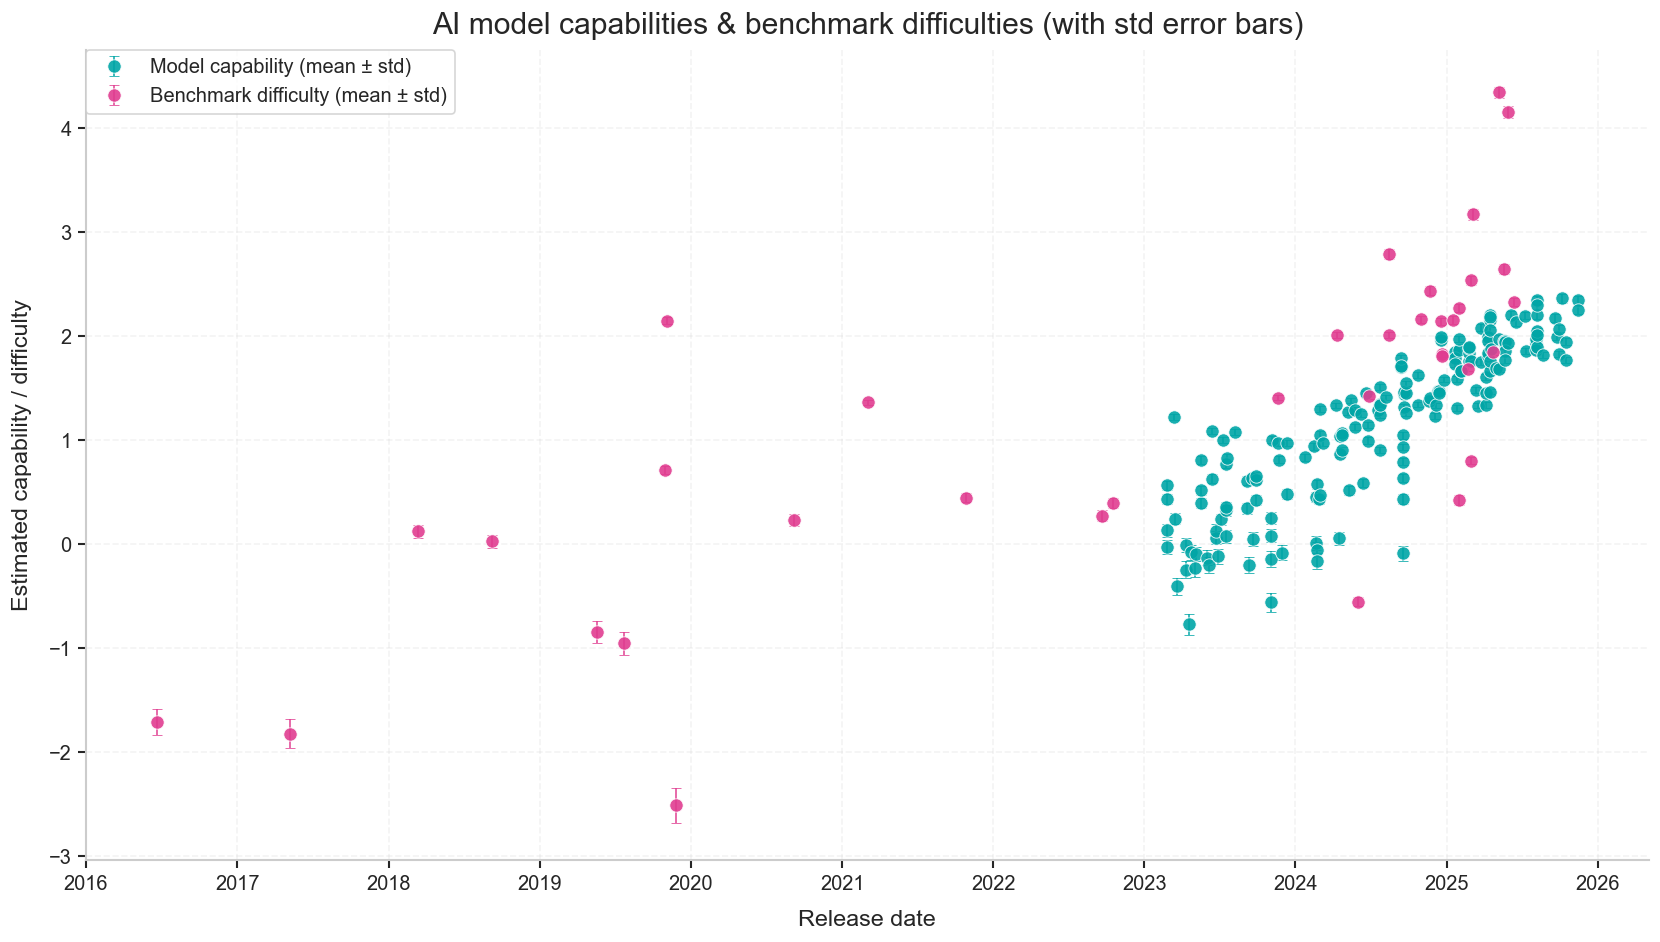

In [9]:
# Capabilities and difficulties over time with std error bars (from variation tables)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Expect these to exist from earlier cells:
# - capability_stats: index=model, columns include ['mean','std']
# - difficulty_stats: index=benchmark_name, columns include ['mean','std']
# - df_cm_anchor: per-model table with 'model' and 'date' (string) or 'date_obj'
# - df_db_anchor: per-benchmark table with 'benchmark_name' and 'benchmark_release_date'

# Merge stats with model release dates
cap_stats_df = capability_stats.reset_index()  # 'model', 'mean', 'std', ...
model_dates = df_cm_anchor[["model", "date"]].drop_duplicates(subset=["model"]).copy()
model_dates["date_obj"] = pd.to_datetime(model_dates["date"], errors="coerce")
cap_plot_df = (
    cap_stats_df.merge(model_dates, on="model", how="left")
    .dropna(subset=["date_obj", "mean"])  # require a date and mean
    .sort_values("date_obj")
)
cap_plot_df["std"] = cap_plot_df["std"].fillna(0.0)

# Merge stats with benchmark release dates
diff_stats_df = difficulty_stats.reset_index()  # 'benchmark_name', 'mean', 'std', ...
bench_dates = (
    df_db_anchor[["benchmark_name", "benchmark_release_date"]]
    .drop_duplicates(subset=["benchmark_name"])
    .copy()
)
bench_dates["benchmark_release_date"] = pd.to_datetime(
    bench_dates["benchmark_release_date"], errors="coerce"
)
diff_plot_df = (
    diff_stats_df.merge(bench_dates, on="benchmark_name", how="left")
    .dropna(subset=["benchmark_release_date", "mean"])  # require a date and mean
    .sort_values("benchmark_release_date")
)
diff_plot_df["std"] = diff_plot_df["std"].fillna(0.0)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.errorbar(
    cap_plot_df["date_obj"],
    cap_plot_df["mean"],
    yerr=cap_plot_df["std"],
    fmt="o",
    color=colors[0],
    ecolor=colors[0],
    markeredgecolor='white',

    elinewidth=1,
    capsize=3,
    alpha=0.9,
    label="Model capability (mean ± std)",
)

ax.errorbar(
    diff_plot_df["benchmark_release_date"],
    diff_plot_df["mean"],
    yerr=diff_plot_df["std"],
    fmt="o",
    color=colors[1],
    ecolor=colors[1],
    markeredgecolor='white',
    elinewidth=1,
    capsize=3,
    alpha=0.9,
    label="Benchmark difficulty (mean ± std)",
)

ax.set_xlabel("Release date", fontsize=14)
ax.set_ylabel("Estimated capability / difficulty", fontsize=14)
ax.set_title(
    "AI model capabilities & benchmark difficulties (with std error bars)", fontsize=18
)
plt.savefig('outputs/figures/figure-15.svg', format='svg')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator())
# fig.autofmt_xdate()

ax.grid(True, alpha=0.25, linestyle="--")
ax.legend(frameon=True, fontsize=12)

plt.tight_layout()
# plt.savefig("outputs/change_anchor/capabilities_and_benchmarks_over_time.pdf")
plt.show()

In [10]:
# ---------------------------------------------------------------------------
# 1)  DIFFICULTY  ––  variation of each benchmark's difficulty estimate
#     across different model anchor pairs
# ---------------------------------------------------------------------------
difficulty_rows = []

for anchor_pair, run in all_runs.items():
    df_db = run["df_db"]  # difficulty table from that fit
    out = df_db[["benchmark_name", "estimated_difficulty"]].copy()
    out["anchor_model_pair"] = anchor_pair  # remember which model pair this came from
    # Also store the individual models for more detailed analysis if needed
    out["anchor_model1"] = run["anchor_model1"]
    out["anchor_model2"] = run["anchor_model2"]
    difficulty_rows.append(out)

difficulty_long = pd.concat(difficulty_rows, ignore_index=True)

# No need to drop trivial rows since we're not anchoring on benchmarks
# All benchmark estimates are free to vary

difficulty_stats = (
    difficulty_long.groupby("benchmark_name")["estimated_difficulty"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",  # how many model pairs estimated this
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 2)  CAPABILITY  ––  variation of each model's capability estimate
#     across different model anchor pairs
# ---------------------------------------------------------------------------
capability_rows = []

for anchor_pair, run in all_runs.items():
    df_cm = run["df_cm1"]  # capability table from that fit
    # Check the actual column name - might be 'model' or 'model_name'
    model_col = "model_name" if "model_name" in df_cm.columns else "model"
    out = df_cm[[model_col, "estimated_capability"]].copy()
    out.rename(columns={model_col: "model"}, inplace=True)  # standardize column name
    out["anchor_model_pair"] = anchor_pair
    # Also store the individual anchor models
    out["anchor_model1"] = run["anchor_model1"]
    out["anchor_model2"] = run["anchor_model2"]
    capability_rows.append(out)

capability_long = pd.concat(capability_rows, ignore_index=True)

# For model capabilities, we might want to exclude rows where the model
# was one of the anchors (since those were fixed)
capability_long_free = capability_long[
    (capability_long["model"] != capability_long["anchor_model1"])
    & (capability_long["model"] != capability_long["anchor_model2"])
]

# Stats for all models (including anchored ones)
capability_stats_all = (
    capability_long.groupby("model")["estimated_capability"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# Stats for non-anchored models only (more meaningful variation)
capability_stats_free = (
    capability_long_free.groupby("model")["estimated_capability"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 3)  SLOPE  ––  variation of each benchmark's slope estimate
# ---------------------------------------------------------------------------
slope_rows = []

for anchor_pair, run in all_runs.items():
    df_db = run["df_db"]
    out = df_db[["benchmark_name", "estimated_slope"]].copy()
    out["anchor_model_pair"] = anchor_pair
    slope_rows.append(out)

slope_long = pd.concat(slope_rows, ignore_index=True)

slope_stats = (
    slope_long.groupby("benchmark_name")["estimated_slope"]
    .agg(
        mean="mean",
        std="std",
        min="min",
        max="max",
        count="count",
        cv=lambda s: s.std(ddof=0) / s.mean() if s.mean() != 0 else np.nan,
    )
    .sort_index()
)

# ---------------------------------------------------------------------------
# 4)  Quick look at results
# ---------------------------------------------------------------------------
print("=== Variation in benchmark difficulties across model anchor pairs ===")
display(difficulty_stats)

print("\n=== Variation in benchmark slopes across model anchor pairs ===")
display(slope_stats)

print("\n=== Variation in model capabilities (all models) ===")
display(capability_stats_all)

print("\n=== Variation in model capabilities (excluding anchored models) ===")
display(capability_stats_free)

# ---------------------------------------------------------------------------
# 5)  Additional analysis: which model pairs give most stable estimates?
# ---------------------------------------------------------------------------
# Calculate overall stability metric for each model pair
stability_by_pair = {}

for anchor_pair in all_runs.keys():
    # Get difficulty variations for this pair
    diff_subset = difficulty_long[difficulty_long["anchor_model_pair"] == anchor_pair]
    cap_subset = capability_long_free[
        capability_long_free["anchor_model_pair"] == anchor_pair
    ]

    # Calculate average deviation from overall means
    diff_devs = []
    for bench in diff_subset["benchmark_name"].unique():
        estimate = diff_subset[diff_subset["benchmark_name"] == bench][
            "estimated_difficulty"
        ].iloc[0]
        overall_mean = difficulty_stats.loc[bench, "mean"]
        diff_devs.append(abs(estimate - overall_mean))

    cap_devs = []
    for model in cap_subset["model"].unique():
        if model in capability_stats_free.index:
            estimate = cap_subset[cap_subset["model"] == model][
                "estimated_capability"
            ].iloc[0]
            overall_mean = capability_stats_free.loc[model, "mean"]
            cap_devs.append(abs(estimate - overall_mean))

    stability_by_pair[anchor_pair] = {
        "mean_difficulty_deviation": np.mean(diff_devs) if diff_devs else np.nan,
        "mean_capability_deviation": np.mean(cap_devs) if cap_devs else np.nan,
        "combined_deviation": (
            np.mean(diff_devs + cap_devs) if (diff_devs or cap_devs) else np.nan
        ),
    }

stability_df = pd.DataFrame(stability_by_pair).T.sort_values("combined_deviation")

print("\n=== Model pair stability (lower deviation = more stable) ===")
display(stability_df.head(10))  # Show top 10 most stable pairs

=== Variation in benchmark difficulties across model anchor pairs ===


,mean,std,min,max,count,cv
benchmark_name,,,,,,
ANLI,0.445005,0.180947,-0.027472,0.714283,177,0.405467
ARC AI2,-0.209223,0.242468,-0.786074,0.120977,177,-1.155619
ARC-AGI,1.993657,0.240381,1.295737,2.215201,177,0.120232
Aider polyglot,1.628521,0.204727,0.995353,1.829792,177,0.125358
BBH,0.096162,0.205572,-0.430775,0.357616,177,2.131733
Balrog,2.295393,0.279582,1.542506,2.558723,177,0.121457
CadEval,1.668774,0.207797,1.028757,1.869631,177,0.124169
Cybench,2.631270,0.298282,1.864480,2.956253,177,0.113040
DeepResearch Bench,2.176087,0.257995,1.453449,2.413957,177,0.118224



=== Variation in benchmark slopes across model anchor pairs ===


,mean,std,min,max,count,cv
benchmark_name,,,,,,
ANLI,0.879456,0.203222,0.711752,1.255343,177,0.230423
ARC AI2,1.592365,0.374576,1.285759,2.331508,177,0.234567
ARC-AGI,4.082457,0.668173,2.867661,4.902099,177,0.163206
Aider polyglot,3.422722,0.580255,2.474801,4.138269,177,0.169051
BBH,1.542446,0.360543,1.244027,2.230709,177,0.233086
Balrog,1.165845,0.199483,0.852407,1.417430,177,0.170622
CadEval,2.337875,0.397635,1.701708,2.831359,177,0.169603
Cybench,1.538184,0.220520,1.184429,1.800599,177,0.142958
DeepResearch Bench,0.621402,0.090118,0.443588,0.727891,177,0.144614



=== Variation in model capabilities (all models) ===


,mean,std,min,max,count,cv
model,,,,,,
Baichuan-2-13B-Base,0.039085,0.212023,-0.497349,0.312467,177,5.409241
Baichuan-2-7B-Base,-0.286963,0.253613,-0.876870,0.060078,177,-0.881284
Baichuan-7B,-0.484209,0.283143,-1.107004,-0.092251,177,-0.583099
Cerebras-GPT-13B,-0.788568,0.331105,-1.459439,-0.322091,177,-0.418694
CodeQwen1.5-7B,-0.279393,0.252255,-0.867247,0.065227,177,-0.900316
...,...,...,...,...,...,...
starcoder2-15b,0.156478,0.200260,-0.361150,0.409836,177,1.276179
starcoder2-3b,-0.521076,0.288639,-1.149261,-0.120970,177,-0.552361
starcoder2-7b,-0.331446,0.259741,-0.927926,0.025103,177,-0.781443



=== Variation in model capabilities (excluding anchored models) ===


,mean,std,min,max,count,cv
model,,,,,,
Baichuan-2-13B-Base,0.036313,0.211627,-0.497349,0.312467,175,5.811181
Baichuan-2-7B-Base,-0.289645,0.253807,-0.876870,0.060078,175,-0.873762
Baichuan-7B,-0.486841,0.283681,-1.107004,-0.092251,175,-0.581031
Cerebras-GPT-13B,-0.791106,0.332141,-1.459439,-0.322091,175,-0.418643
CodeQwen1.5-7B,-0.282070,0.252440,-0.867247,0.065227,175,-0.892396
...,...,...,...,...,...,...
starcoder2-15b,0.153672,0.199661,-0.361150,0.409836,175,1.295547
starcoder2-3b,-0.523689,0.289244,-1.149261,-0.120970,175,-0.550740
starcoder2-7b,-0.334110,0.260018,-0.927926,0.025103,175,-0.776014



=== Model pair stability (lower deviation = more stable) ===


,mean_difficulty_deviation,mean_capability_deviation,combined_deviation
Qwen2.5-72B_Llama-4-Maverick-17B-128E-Instruct,0.092486,0.076161,0.079060
Qwen2.5-Coder-32B_Phi-3-small-8k-instruct,0.066124,0.088097,0.084195
PaLM 2-L_Qwen2.5-Coder-7B,0.129693,0.080396,0.089150
amazon.nova-pro-v1:0_gpt-4-0314,0.084807,0.104302,0.100840
Qwen2.5-Coder-14B_Phi-3-mini-4k-instruct,0.107852,0.104300,0.104931
Mixtral-8x7B-v0.1_Llama-3.1-8B-Instruct,0.097677,0.111821,0.109310
Llama-3.1-8B-Instruct_Qwen2.5-Coder-14B,0.101737,0.112891,0.110911
claude-2.1_gemini-1.0-pro-001,0.101287,0.126695,0.122183
gpt-3.5-turbo-0125_StableBeluga2,0.132054,0.122492,0.124190
gemini-1.0-pro-001_Mixtral-8x7B-v0.1,0.106213,0.129080,0.125019


In [11]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------------------
# Spearman rank correlation across anchor model pairs
# - Difficulties (by benchmark)
# - Capabilities (by model)
# Robust to duplicates and missing values
# ---------------------------------------------------------------------------


def _spearman_corr_from_long(
    df_long: pd.DataFrame, index_col: str, columns_col: str, values_col: str
) -> pd.DataFrame:
    wide = df_long.pivot_table(
        index=index_col,
        columns=columns_col,
        values=values_col,
        aggfunc="mean",
    )
    wide = wide.apply(pd.to_numeric, errors="coerce").dropna(axis=0, how="all")
    if wide.shape[1] < 2:
        return pd.DataFrame()
    ranks = wide.rank(axis=0, method="average", na_option="keep")
    return ranks.corr(method="pearson", min_periods=2)


# --- Difficulties across anchor model pairs ---------------------------------
print("=== Spearman across anchor model pairs (benchmark difficulties) ===")
spearman_difficulty_pairs = _spearman_corr_from_long(
    summary_benchmarks.rename(columns={"anchor_model_pair": "anchor"}),
    index_col="benchmark_name",
    columns_col="anchor",
    values_col="estimated_difficulty",
)
if spearman_difficulty_pairs.empty:
    print(
        "Not enough comparable fits to compute correlations for difficulties across model pairs."
    )
else:
    display(spearman_difficulty_pairs)
    mean_rho_difficulty_pairs = (
        spearman_difficulty_pairs.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per model-pair fit (difficulties):")
    display(mean_rho_difficulty_pairs)

# --- Capabilities across anchor model pairs ---------------------------------
print("\n=== Spearman across anchor model pairs (model capabilities) ===")
spearman_capability_pairs = _spearman_corr_from_long(
    summary_models.rename(columns={"anchor_model_pair": "anchor"}),
    index_col="model",
    columns_col="anchor",
    values_col="estimated_capability",
)
if spearman_capability_pairs.empty:
    print(
        "Not enough comparable fits to compute correlations for capabilities across model pairs."
    )
else:
    display(spearman_capability_pairs)
    mean_rho_capability_pairs = (
        spearman_capability_pairs.apply(lambda s: s.drop(labels=s.name).mean(), axis=0)
        .sort_values(ascending=False)
        .to_frame("mean_rho")
    )
    print("\nMean off-diagonal Spearman per model-pair fit (capabilities):")
    display(mean_rho_capability_pairs)

=== Spearman across anchor model pairs (benchmark difficulties) ===


anchor,Baichuan-2-13B-Base_Llama-2-13b,Baichuan-2-7B-Base_starcoder2-7b,Baichuan-7B_deepseek-coder-6.7b-base,Cerebras-GPT-13B_deepseek-coder-1.3b-base,CodeQwen1.5-7B_Baichuan-2-7B-Base,DeepSeek-Coder-V2-Lite-Base_gemma-7b,DeepSeek-R1-0528_claude-opus-4-1-20250805_16K,DeepSeek-R1-Distill-Llama-70B_claude-sonnet-4-20250514,DeepSeek-R1_claude-3-7-sonnet-20250219_16K,DeepSeek-V2_gpt-4o-mini-2024-07-18,...,qwen-max-2025-01-25_DeepSeek-V3,qwen2-72b-instruct_Llama-3.1-70B-Instruct,qwen2.5-72b-instruct_gpt-4o-2024-08-06,qwen3-235b-a22b_mistral-medium-2505,qwen3-max-2025-09-23_gemini-2.5-pro-preview-05-06,starcoder2-15b_Nemotron-4 15B,starcoder2-3b_phi-1_5,starcoder2-7b_vicuna-13b-v1.1,vicuna-13b-v1.1_LLaMA-7B,xgen-7b-8k-base_Baichuan-7B
anchor,,,,,,,,,,,,,,,,,,,,,
Baichuan-2-13B-Base_Llama-2-13b,1.000000,0.999781,0.999781,1.000000,0.999781,1.000000,0.998906,0.998468,0.998906,0.998468,...,0.998468,0.998687,0.998468,0.998468,0.997593,1.000000,0.999781,0.999781,0.999781,0.999781
Baichuan-2-7B-Base_starcoder2-7b,0.999781,1.000000,1.000000,0.999781,1.000000,0.999781,0.998687,0.998249,0.998687,0.998249,...,0.998249,0.998468,0.998249,0.998249,0.998249,0.999781,1.000000,1.000000,1.000000,1.000000
Baichuan-7B_deepseek-coder-6.7b-base,0.999781,1.000000,1.000000,0.999781,1.000000,0.999781,0.998687,0.998249,0.998687,0.998249,...,0.998249,0.998468,0.998249,0.998249,0.998249,0.999781,1.000000,1.000000,1.000000,1.000000
Cerebras-GPT-13B_deepseek-coder-1.3b-base,1.000000,0.999781,0.999781,1.000000,0.999781,1.000000,0.998906,0.998468,0.998906,0.998468,...,0.998468,0.998687,0.998468,0.998468,0.997593,1.000000,0.999781,0.999781,0.999781,0.999781
CodeQwen1.5-7B_Baichuan-2-7B-Base,0.999781,1.000000,1.000000,0.999781,1.000000,0.999781,0.998687,0.998249,0.998687,0.998249,...,0.998249,0.998468,0.998249,0.998249,0.998249,0.999781,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
starcoder2-15b_Nemotron-4 15B,1.000000,0.999781,0.999781,1.000000,0.999781,1.000000,0.998906,0.998468,0.998906,0.998468,...,0.998468,0.998687,0.998468,0.998468,0.997593,1.000000,0.999781,0.999781,0.999781,0.999781
starcoder2-3b_phi-1_5,0.999781,1.000000,1.000000,0.999781,1.000000,0.999781,0.998687,0.998249,0.998687,0.998249,...,0.998249,0.998468,0.998249,0.998249,0.998249,0.999781,1.000000,1.000000,1.000000,1.000000
starcoder2-7b_vicuna-13b-v1.1,0.999781,1.000000,1.000000,0.999781,1.000000,0.999781,0.998687,0.998249,0.998687,0.998249,...,0.998249,0.998468,0.998249,0.998249,0.998249,0.999781,1.000000,1.000000,1.000000,1.000000



Mean off-diagonal Spearman per model-pair fit (difficulties):


,mean_rho
anchor,
gpt-5-mini-2025-08-07_medium_gpt-5-nano-2025-08-07_high,0.999448
gemini-2.5-pro-preview-03-25_o1-2024-12-17_medium,0.999448
gemini-2.5-flash-preview-04-17_claude-opus-4-1-20250805,0.999448
gpt-5-nano-2025-08-07_high_gemini-2.5-pro-preview-03-25,0.999448
gpt-5-nano-2025-08-07_medium_claude-3-7-sonnet-20250219_32K,0.999448
...,...
mpt-30b_CodeQwen1.5-7B,0.998694
LLaMA-13B_chatglm2-6b,0.998694
chatglm2-6b_deepseek-coder-33b-base,0.998694



=== Spearman across anchor model pairs (model capabilities) ===


anchor,Baichuan-2-13B-Base_Llama-2-13b,Baichuan-2-7B-Base_starcoder2-7b,Baichuan-7B_deepseek-coder-6.7b-base,Cerebras-GPT-13B_deepseek-coder-1.3b-base,CodeQwen1.5-7B_Baichuan-2-7B-Base,DeepSeek-Coder-V2-Lite-Base_gemma-7b,DeepSeek-R1-0528_claude-opus-4-1-20250805_16K,DeepSeek-R1-Distill-Llama-70B_claude-sonnet-4-20250514,DeepSeek-R1_claude-3-7-sonnet-20250219_16K,DeepSeek-V2_gpt-4o-mini-2024-07-18,...,qwen-max-2025-01-25_DeepSeek-V3,qwen2-72b-instruct_Llama-3.1-70B-Instruct,qwen2.5-72b-instruct_gpt-4o-2024-08-06,qwen3-235b-a22b_mistral-medium-2505,qwen3-max-2025-09-23_gemini-2.5-pro-preview-05-06,starcoder2-15b_Nemotron-4 15B,starcoder2-3b_phi-1_5,starcoder2-7b_vicuna-13b-v1.1,vicuna-13b-v1.1_LLaMA-7B,xgen-7b-8k-base_Baichuan-7B
anchor,,,,,,,,,,,,,,,,,,,,,
Baichuan-2-13B-Base_Llama-2-13b,1.000000,0.999962,0.999932,0.999960,0.999955,0.999968,0.999870,0.999906,0.999906,0.999838,...,0.999921,0.999896,0.999915,0.999915,0.999891,0.999981,0.999947,0.999979,0.999966,0.999928
Baichuan-2-7B-Base_starcoder2-7b,0.999962,1.000000,0.999930,0.999957,0.999977,0.999932,0.999832,0.999866,0.999868,0.999781,...,0.999879,0.999851,0.999877,0.999874,0.999853,0.999945,0.999949,0.999966,0.999964,0.999930
Baichuan-7B_deepseek-coder-6.7b-base,0.999932,0.999930,1.000000,0.999957,0.999915,0.999902,0.999808,0.999840,0.999840,0.999730,...,0.999845,0.999815,0.999849,0.999845,0.999834,0.999915,0.999940,0.999951,0.999957,0.999947
Cerebras-GPT-13B_deepseek-coder-1.3b-base,0.999960,0.999957,0.999957,1.000000,0.999940,0.999934,0.999843,0.999877,0.999874,0.999760,...,0.999879,0.999845,0.999881,0.999877,0.999868,0.999943,0.999983,0.999979,0.999987,0.999964
CodeQwen1.5-7B_Baichuan-2-7B-Base,0.999955,0.999977,0.999915,0.999940,1.000000,0.999926,0.999828,0.999862,0.999864,0.999779,...,0.999874,0.999849,0.999872,0.999870,0.999851,0.999938,0.999932,0.999955,0.999949,0.999913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
starcoder2-15b_Nemotron-4 15B,0.999981,0.999945,0.999915,0.999943,0.999938,0.999966,0.999862,0.999900,0.999900,0.999832,...,0.999915,0.999889,0.999909,0.999909,0.999885,1.000000,0.999930,0.999962,0.999949,0.999911
starcoder2-3b_phi-1_5,0.999947,0.999949,0.999940,0.999983,0.999932,0.999917,0.999821,0.999853,0.999853,0.999740,...,0.999857,0.999828,0.999864,0.999857,0.999847,0.999930,1.000000,0.999970,0.999979,0.999943
starcoder2-7b_vicuna-13b-v1.1,0.999979,0.999966,0.999951,0.999979,0.999955,0.999949,0.999847,0.999883,0.999883,0.999798,...,0.999894,0.999868,0.999894,0.999889,0.999868,0.999962,0.999970,1.000000,0.999983,0.999951



Mean off-diagonal Spearman per model-pair fit (capabilities):


,mean_rho
anchor,
gemini-1.5-pro-002_gemma-3-27b-it,0.999916
gemma-3-27b-it_gemini-2.0-flash-exp,0.999914
gemini-2.0-flash-thinking-exp-01-21_o1-mini-2024-09-12_medium,0.999913
gpt-4o-2024-11-20_gpt-4o-2024-05-13,0.999911
mistral-medium-2505_gpt-4.1-mini-2025-04-14,0.999910
...,...
gemini-1.5-pro-001_DeepSeek-V2,0.999674
claude-2.1_gemini-1.0-pro-001,0.999652
PaLM 2-L_Qwen2.5-Coder-7B,0.999631
